#  Multivariable Regression Model for House Price Prediction in Boston

## 0. Boston Housing Dataset Overview

| Feature | Description |
|---------|-------------|
| CRIM    | per capita crime rate by town |
| ZN      | proportion of residential land zoned for lots over 25,000 sq.ft. |
| INDUS   | proportion of non-retail business acres per town |
| CHAS    | Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
| NOX     | nitric oxides concentration (parts per 10 million) |
| RM      | average number of rooms per dwelling |
| AGE     | proportion of owner-occupied units built prior to 1940 |
| DIS     | weighted distances to five Boston employment centres |
| RAD     | index of accessibility to radial highways |
| TAX     | full-value property-tax rate per $10,000 |
| PTRATIO | pupil-teacher ratio by town |
| B       | 1000(Bk - 0.63)^2 <br> where Bk is the proportion of blacks by town |
| LSTAT   | % lower status of the population |
| PRICE   | Median value of owner-occupied homes in `$1000s` (target) |

**Dataset Summary:**
- Number of instances: 506  
- Number of features: 13 + target  
- Missing values: None  
- Source: [UCI ML Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)  
- Original paper: [Harrison & Rubinfeld, 1978](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

## 1. Import & Settings

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy as sc

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

pd.options.display.float_format = '{:,.2f}'.format

## 2. Load Dataset

In [2]:
data = pd.read_csv('data/boston.csv', index_col=0)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


## 3. Preliminary Data Exploration 

In [23]:
print('Data shape: ', data.shape)
print('Data columns: ', data.columns)
print('Missing or null values in dataset: ', data.isna().values.any())
print('Duplicated values in dataset: ', data.duplicated().values.any())

Data shape:  (506, 14)
Data columns:  Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')
Missing or null values in dataset:  False
Duplicated values in dataset:  False


## 4. Descriptive Statistics


In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


## 5. Distributions

### 5.1. Price Distribution

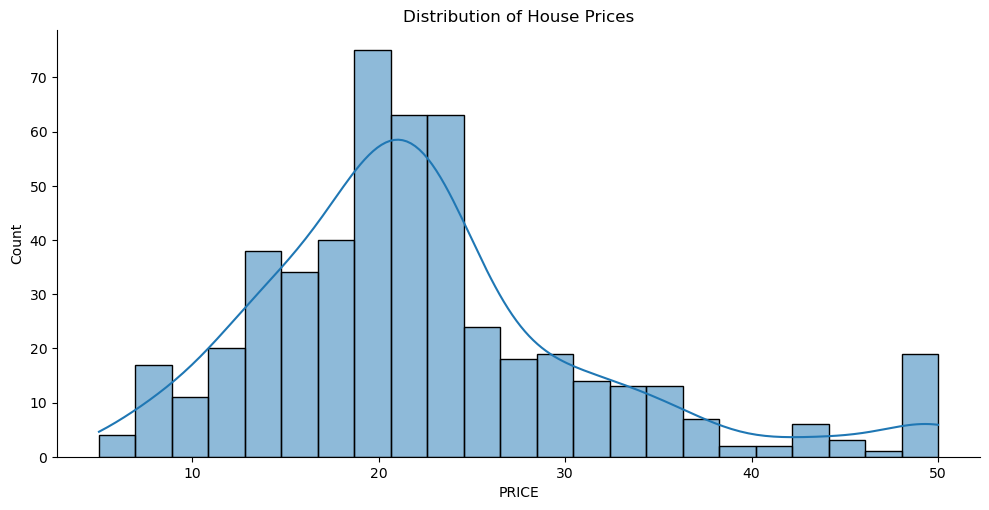

In [5]:
sns.displot(data, x='PRICE', kde=True, aspect=2)

plt.title('Distribution of House Prices')
plt.show()

### 5.2. Distance to Employment Centers

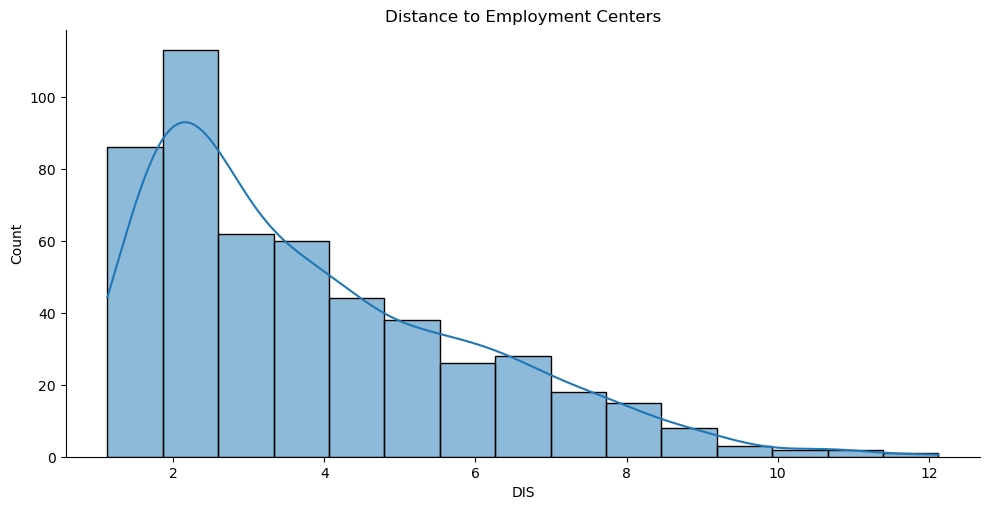

In [6]:
sns.displot(data, x='DIS', kde=True, aspect=2)

plt.title('Distance to Employment Centers')
plt.show()

### 5.3. Rooms distribution

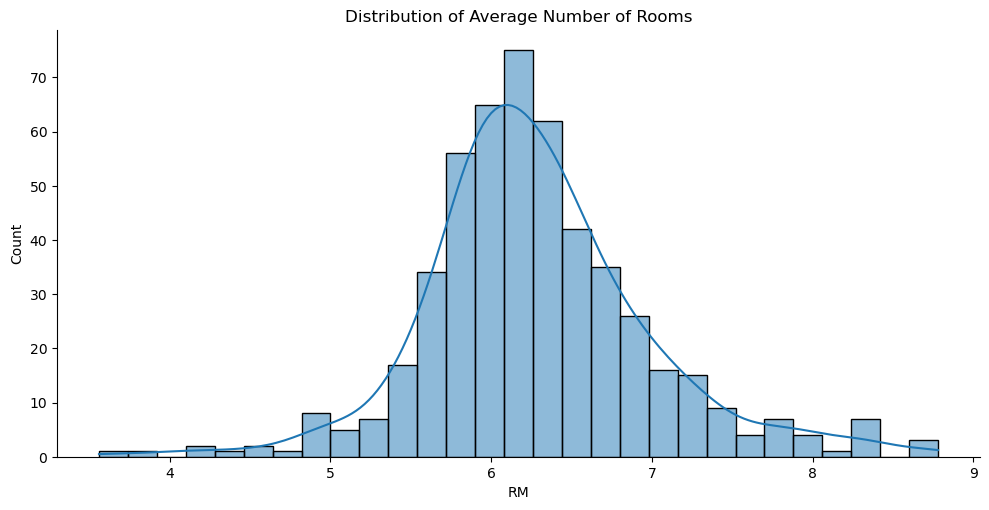

In [7]:
sns.displot(data, x='RM', kde=True, aspect=2)

plt.title('Distribution of Average Number of Rooms')
plt.show()

### 5.4. Highway Accessibility Index

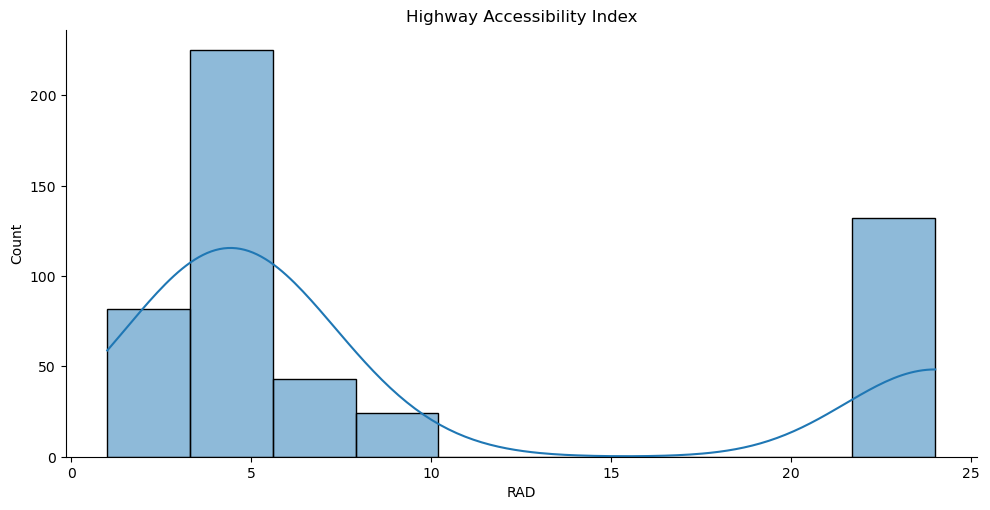

In [8]:
sns.displot(data, x='RAD', kde=True, aspect=2)

plt.title('Highway Accessibility Index')
plt.show()

### 5.5 Properties Near the Charles River

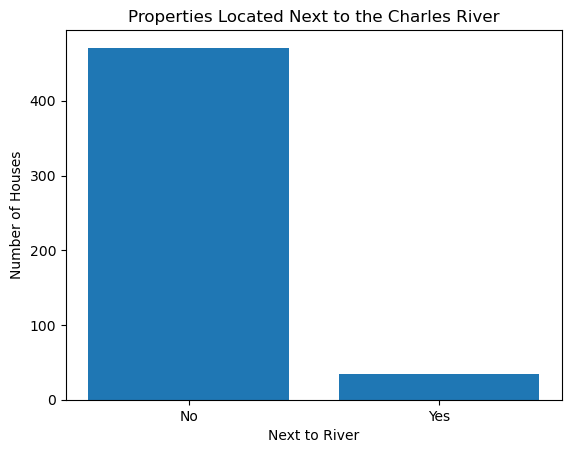

In [9]:
grouped_data = data.groupby('CHAS', as_index=False)['CRIM'].count()

plt.bar(['No', 'Yes'], grouped_data['CRIM'])
plt.title('Properties Located Next to the Charles River')
plt.xlabel('Next to River')
plt.ylabel('Number of Houses')
plt.show()

## 6. Pair Relationships

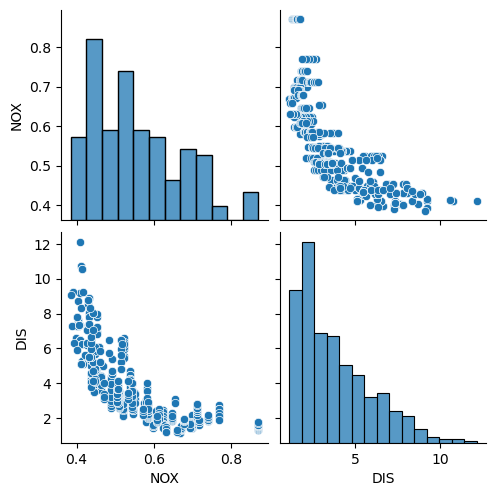

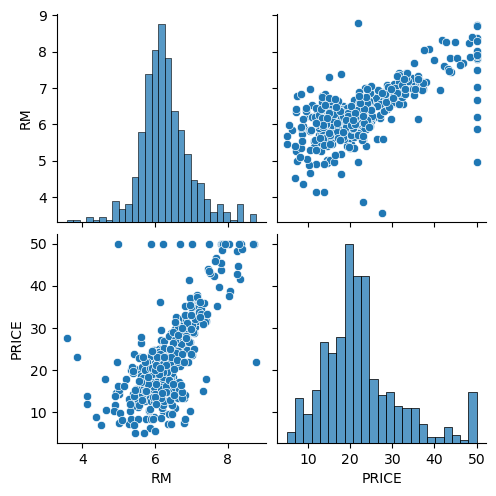

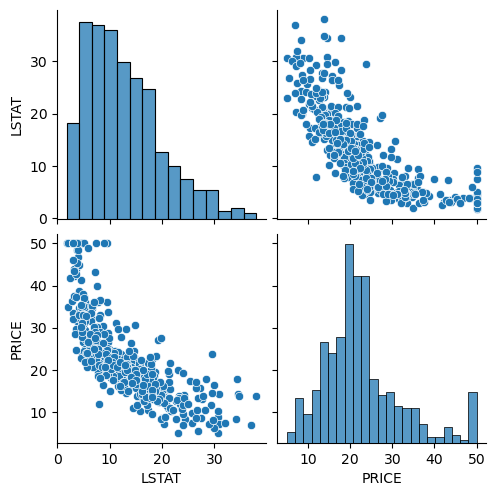

In [10]:
sns.pairplot(data[['NOX','DIS']])
sns.pairplot(data[['RM','PRICE']])
sns.pairplot(data[['LSTAT','PRICE']])

## 7. Jointplots

### 7.1 Key Feature Relationship

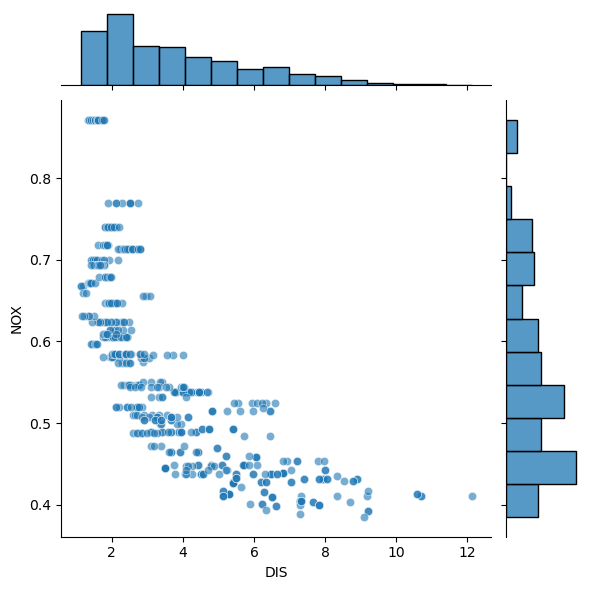

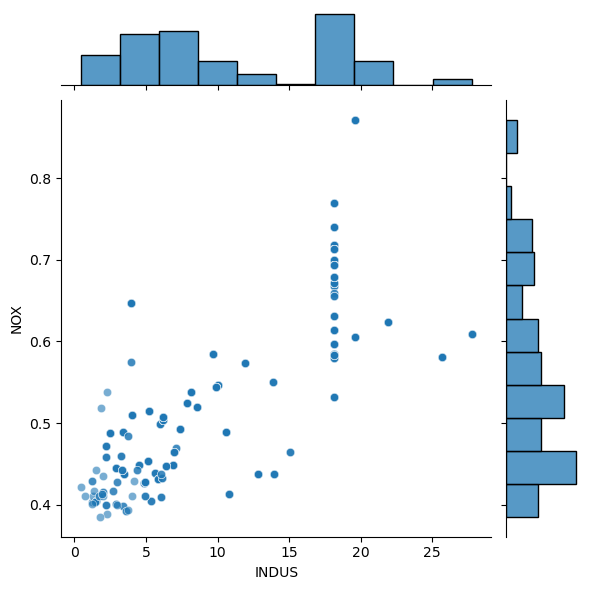

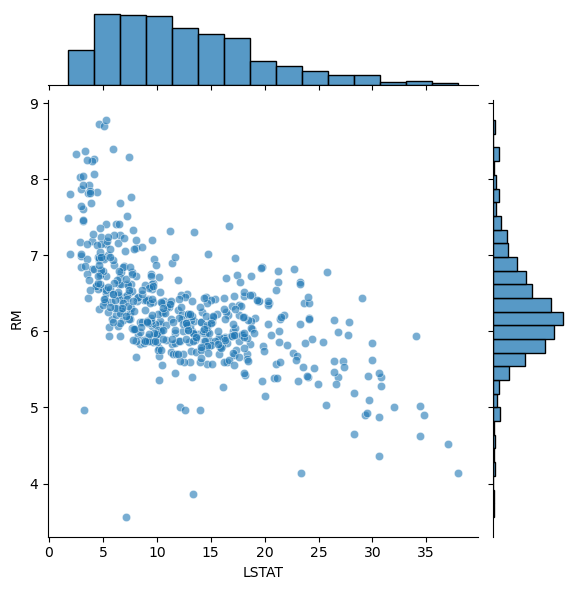

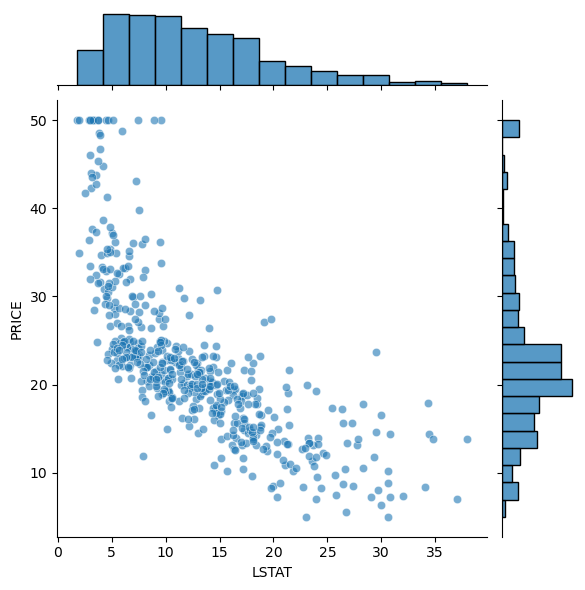

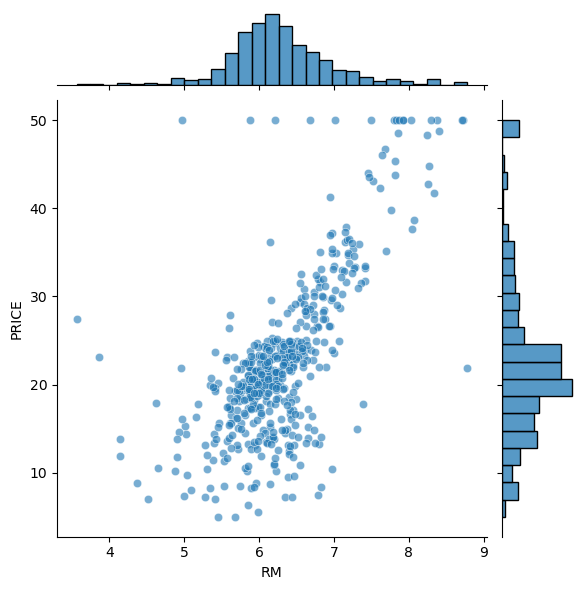

In [11]:
sns.jointplot(data, x='DIS', y='NOX', joint_kws={'alpha':0.6})
sns.jointplot(data, x='INDUS', y='NOX', joint_kws={'alpha':0.6})
sns.jointplot(data, x='LSTAT', y='RM', joint_kws={'alpha':0.6})
sns.jointplot(data, x='LSTAT', y='PRICE', joint_kws={'alpha':0.6})
sns.jointplot(data, x='RM', y='PRICE', joint_kws={'alpha':0.6})

## 8. Train-Test Split

In [12]:
X = data.drop('PRICE', axis=1)
y = data['PRICE']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

## 9. Linear Regression Model (Original Prices)

In [13]:
regression = LinearRegression()
regression.fit(X_train, y_train)

regression.score(X_train, y_train)

0.750121534530608

## 10. Model Coefficients

In [14]:
regression_coef = pd.DataFrame(
    data=regression.coef_,
    index=X_train.columns,
    columns=['Coefficient']
)

regression_coef

,Coefficient
CRIM,-0.13
ZN,0.06
INDUS,-0.01
CHAS,1.97
NOX,-16.27
RM,3.11
AGE,0.02
DIS,-1.48
RAD,0.30
TAX,-0.01


## 11 Residuals Analysis - Original Model

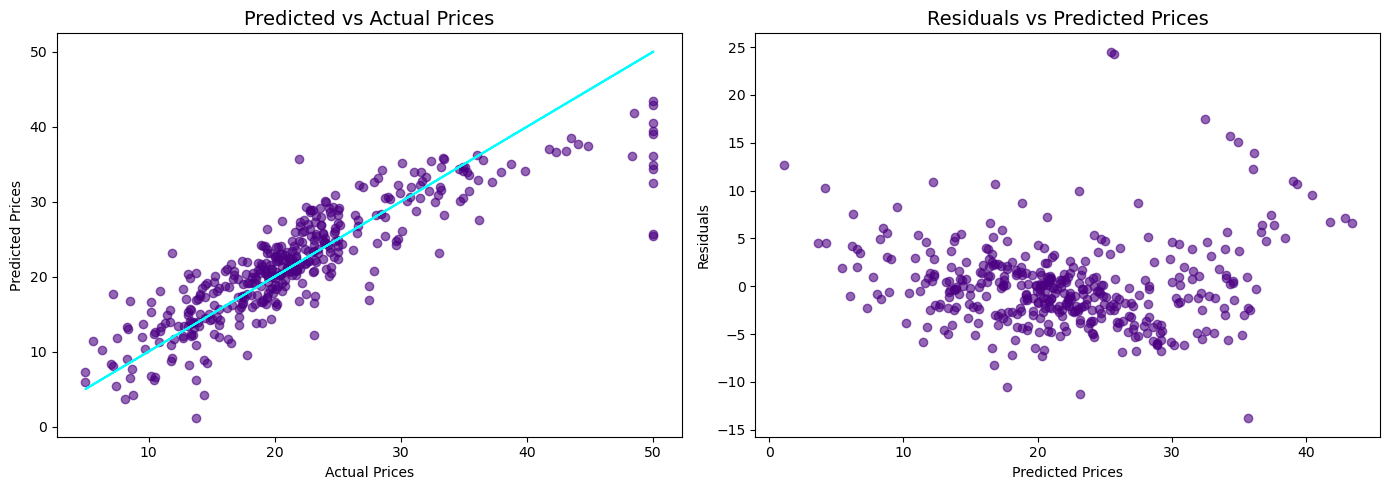

In [15]:
predicted_values = regression.predict(X_train)
residuals = y_train - predicted_values

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y_train, predicted_values, color='indigo', alpha=0.6)
axes[0].plot(y_train, y_train, color='cyan')  
axes[0].set_title('Predicted vs Actual Prices', fontsize=14)
axes[0].set_xlabel('Actual Prices')
axes[0].set_ylabel('Predicted Prices')

axes[1].scatter(predicted_values, residuals, color='indigo', alpha=0.6)
axes[1].set_title('Residuals vs Predicted Prices', fontsize=14)
axes[1].set_xlabel('Predicted Prices')
axes[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

## 12. Target Variable Distribution and Log Transformation

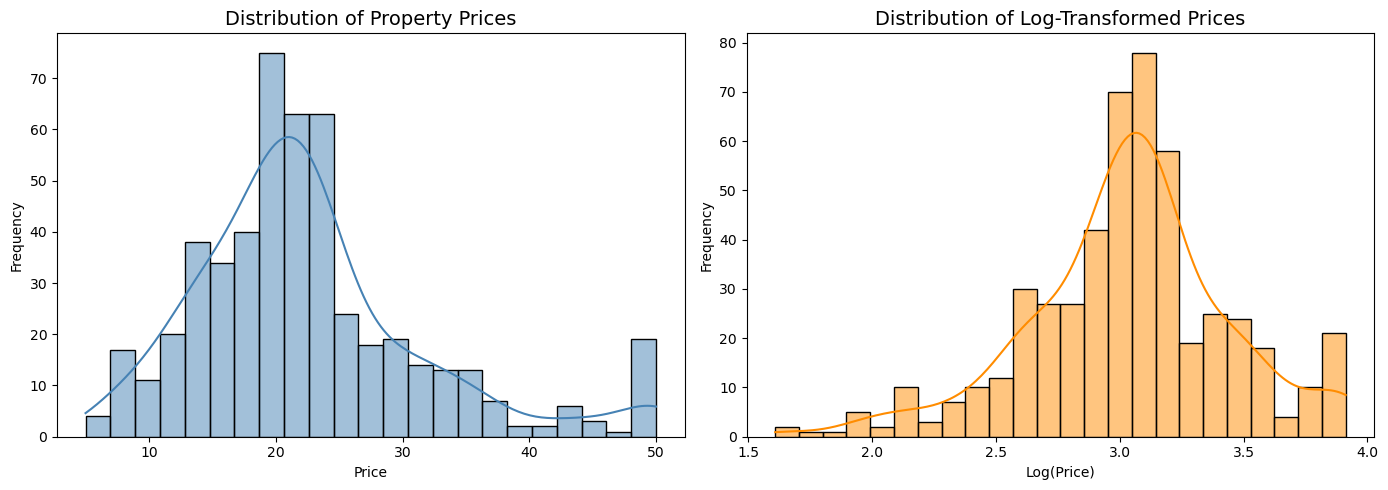

In [16]:
price_log = np.log(data.PRICE)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data['PRICE'], kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('Distribution of Property Prices', fontsize=14)
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

sns.histplot(price_log, kde=True, ax=axes[1], color='darkorange')
axes[1].set_title('Distribution of Log-Transformed Prices', fontsize=14)
axes[1].set_xlabel('Log(Price)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 13. Log Model

### 13.1 Linear Regression with Log Prices

In [17]:
X = data.drop('PRICE', axis=1)
y = price_log

log_x_train, log_x_test, log_y_train, log_y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

log_regression = LinearRegression()
log_regression.fit(log_x_train, log_y_train)

log_regression.score(log_x_train, log_y_train)

0.7930234826697583

### 13.2 Log Prices Model Coefficienets

In [18]:
df_log_coef = pd.DataFrame(
    data=log_regression.coef_,
    index=X_train.columns
    , columns=['Coefficient']
)

df_log_coef

,Coefficient
CRIM,-0.01
ZN,0.00
INDUS,0.00
CHAS,0.08
NOX,-0.70
RM,0.07
AGE,0.00
DIS,-0.05
RAD,0.01
TAX,-0.00


### 13.2 Residentual Analysis - Log Prices Model

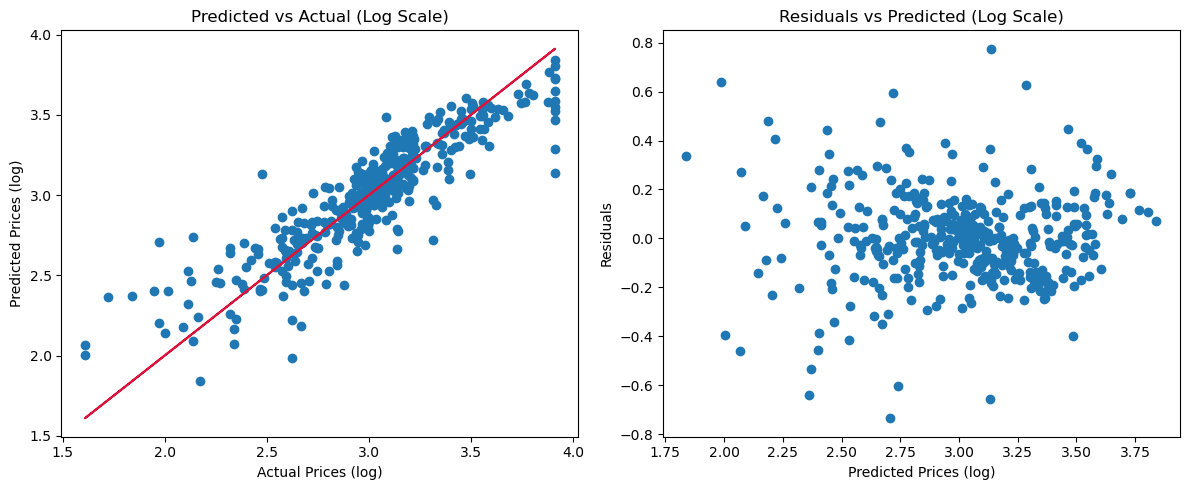

In [19]:
log_predicted_values = log_regression.predict(log_x_train)
log_residuals = log_y_train - log_predicted_values

fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].scatter(log_y_train, log_predicted_values)
axes[0].plot(log_y_train, log_y_train, color='crimson')  
axes[0].set_xlabel('Actual Prices (log)')
axes[0].set_ylabel('Predicted Prices (log)')
axes[0].set_title('Predicted vs Actual (Log Scale)')

axes[1].scatter(log_predicted_values, log_residuals)
axes[1].set_xlabel('Predicted Prices (log)')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs Predicted (Log Scale)')

plt.tight_layout()
plt.show()

## 14. Model Performance Comparison

In [20]:
print('Regression Score with Log Pices: ', log_regression.score(log_x_test, log_y_test))
print('Regression Score:', regression.score(X_test, y_test))

Regression Score with Log Pices:  0.7446922306260735
Regression Score: 0.6709339839115624


## 15. Predicitions

### 15.1 Predicting Property Value - Average House

In [21]:
features = data.drop(['PRICE'], axis=1)

average_vals = features.mean().values
property_stats = pd.DataFrame(
    data=average_vals.reshape(1, len(features.columns)),
    columns=features.columns
)

log_estimate = log_regression.predict(property_stats)[0]
dollar_price = np.exp(log_estimate) * 1000

print(f'Predicted house price: {dollar_price:.2f}$')

Predicted house price: 20703.18$


### 15.2 Predicting Property Value - Custom Scenario

In [22]:
property2_stats = property_stats.copy()

property2_stats['CHAS'] = 1
property2_stats['RM'] = 8
property2_stats['PTRATIO'] = 20
property2_stats['DIS'] = 5
property2_stats['NOX'] = data.NOX.quantile(0.75)
property2_stats['LSTAT'] = data.LSTAT.quantile(0.25)

log_estimate_2 = log_regression.predict(property2_stats)[0]
dollar_price2 = np.exp(log_estimate_2) * 1000

print(f'Predicted house price: {dollar_price2:.2f}$')

Predicted house price: 25792.03$


## 16. Conclusions

- The log transformed mode achieved better residual behaviour and generalization
- Number of rooms and socio-economic factors were strong predictors of price.